<a href="https://colab.research.google.com/github/alebaldion/Challenge_TelecomX_latam_analisis-de-evasion-de-clientes-parte-2/blob/main/FINAL_Challenge_TelecomX_latam_analisis_de_evasion_de_clientes_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💡 **1.Acerca del Desafío – Predicción de Cancelación (Churn) en Telecom X**

###Objetivo General

**Predecir qué clientes tienen mayor probabilidad de cancelar sus servicios.** Esto permitirá a la empresa anticiparse y tomar medidas para retenerlos.

#🛠️ **2. Preparación de los Datos**

# 📦 2.1 Carga Inicial y Preparación de Librerías

In [ ]:
# Importación de librerías fundamentales para el análisis y manipulación de datos
import pandas as pd
import numpy as np

# Importación de librerías para visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

# Importación de herramientas para preprocesamiento de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Importación de los modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Importación de métricas para evaluar el rendimiento de los modelos
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Configuración del estilo visual de los gráficos para todo el proyecto
sns.set_style("whitegrid")
# Definición de una paleta de colores consistente
PALETA_COLORES = "viridis"
sns.set_palette(PALETA_COLORES)

# Mensaje de bienvenida que confirma la preparación del entorno
print("✅ Entorno configurado y librerías cargadas exitosamente.")

✅ Entorno configurado y librerías cargadas exitosamente.


#📥 2.2 Carga del Dataset Tratado de Clientes de TelecomX

In [ ]:
# URL del archivo CSV con los datos ya tratados
url_datos = "https://raw.githubusercontent.com/alebaldion/Challenge_TelecomX_latam_analisis-de-evasion-de-clientes-parte-2/refs/heads/main/telecomx_datos_tratados.csv"

# Carga de los datos en un DataFrame de pandas, nombrando la variable como se solicitó
try:
    df_clientes = pd.read_csv(url_datos)
    print("📂 Datos cargados correctamente.")
    print("Primeras 5 filas del conjunto de datos:")
    display(df_clientes.head())
except Exception as e:
    print(f"❌ Error al cargar los datos: {e}")

# Muestra información general del DataFrame para verificar tipos y nulos
print("\nInformación general del DataFrame:")
df_clientes.info()

📂 Datos cargados correctamente.
Primeras 5 filas del conjunto de datos:


,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,DailyCharges
0,0002-orfbo,No,female,0,1,1,9,1,no,dsl,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.186667
1,0003-mknfe,No,male,0,0,0,9,1,yes,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,Yes,male,0,0,0,4,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-igkff,Yes,male,1,1,0,13,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-exchz,Yes,female,1,1,0,3,1,no,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.796667



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   Gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   Tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contra

#🧹2.3 Eliminación de columnas IRRELEVANTES POR no SER predictiva: 'customerID'

In [ ]:
# Eliminar la columna 'customerID' ya que es un identificador único y no aporta valor predictivo

if 'customerID' in df_clientes.columns:
    df_clientes.drop('customerID', axis=1, inplace=True)
    print("🗑️ Columna 'customerID' eliminada exitosamente.")
    print("Columnas actuales en el DataFrame:", df_clientes.columns.tolist())
else:
    print("👍 La columna 'customerID' no se encontró o ya fue eliminada.")

🗑️ Columna 'customerID' eliminada exitosamente.
Columnas actuales en el DataFrame: ['Churn', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'DailyCharges']


#2.3 🔄 Transformación de Variables Categóricas con One-Hot Encoding

In [ ]:
# La columna 'Churn' es nuestro objetivo.
df_clientes['Churn'] = df_clientes['Churn'].map({'Yes': 1, 'No': 0})
print("🏷️ Columna 'Churn' codificada a 1 (Sí) y 0 (No).")

# Identificar las columnas categóricas restantes para aplicar One-Hot Encoding
columnas_categoricas = df_clientes.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding usando pandas.get_dummies()
df_clientes_codificado = pd.get_dummies(df_clientes, columns=columnas_categoricas, drop_first=True)
print("\n✅ Variables categóricas transformadas usando One-Hot Encoding.")
print("Dimensiones del nuevo DataFrame:", df_clientes_codificado.shape)
print("Primeras 5 filas del DataFrame codificado:")
display(df_clientes_codificado.head())

🏷️ Columna 'Churn' codificada a 1 (Sí) y 0 (No).

✅ Variables categóricas transformadas usando One-Hot Encoding.
Dimensiones del nuevo DataFrame: (7267, 25)
Primeras 5 filas del DataFrame codificado:


,Churn,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,DailyCharges,...,OnlineBackup_yes,DeviceProtection_yes,TechSupport_yes,StreamingTV_yes,StreamingMovies_yes,Contract_one year,Contract_two year,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0.0,0,1,1,9,1,1,65.6,593.30,2.186667,...,True,False,True,True,False,True,False,False,False,True
1,0.0,0,0,0,9,1,0,59.9,542.40,1.996667,...,False,False,False,False,True,False,False,False,False,True
2,1.0,0,0,0,4,1,1,73.9,280.85,2.463333,...,False,True,False,False,False,False,False,False,True,False
3,1.0,1,1,0,13,1,1,98.0,1237.85,3.266667,...,True,True,False,True,True,False,False,False,True,False
4,1.0,1,1,0,3,1,1,83.9,267.40,2.796667,...,False,False,True,True,False,False,False,False,False,True


# 2.4 📉 Verificación de la Proporción de Cancelación

📊 Proporción de cancelación de clientes:
Churn
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


/tmp/ipython-input-3000189632.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df_clientes_codificado, palette=PALETA_COLORES)


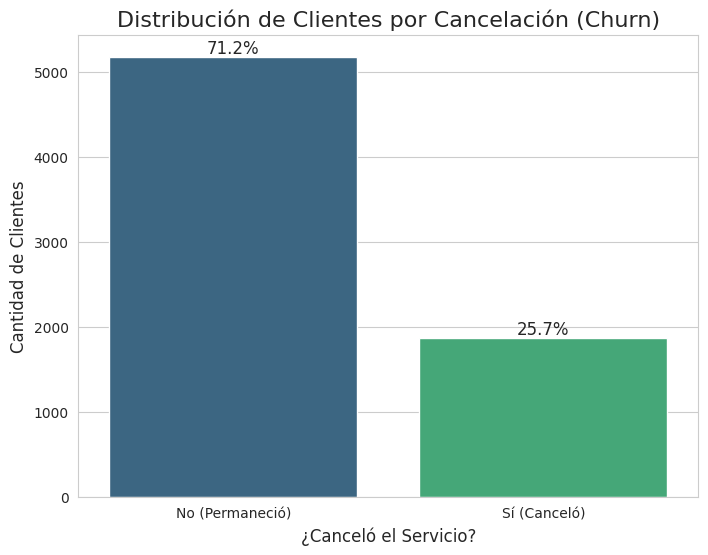


🔎 Evaluación: Existe un claro desbalance en los datos. La cantidad de clientes que no cancelaron (Clase 0) es significativamente mayor que la de los que sí cancelaron (Clase 1).


In [ ]:
# Calcular la proporción de Churn
churn_proporcion = df_clientes_codificado['Churn'].value_counts(normalize=True) * 100
print("📊 Proporción de cancelación de clientes:")
print(churn_proporcion)

# Visualizar la distribución de la variable objetivo 'Churn'
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churn', data=df_clientes_codificado, palette=PALETA_COLORES)
plt.title('Distribución de Clientes por Cancelación (Churn)', fontsize=16)
plt.xlabel('¿Canceló el Servicio?', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No (Permaneció)', 'Sí (Canceló)'])

# Añadir porcentajes en las barras para mayor claridad
total = len(df_clientes_codificado['Churn'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.show()

# Conclusión sobre el balance
print("\n🔎 Evaluación: Existe un claro desbalance en los datos. La cantidad de clientes que no cancelaron (Clase 0) es significativamente mayor que la de los que sí cancelaron (Clase 1).")

#📘  2.5 Balanceo de Clases con SMOTE (¿Qué estamos haciendo y por qué?)

In [ ]:
print("🔎 Verificando la presencia de valores nulos (NaN) antes de la corrección:")
print(df_clientes_codificado.isnull().sum().sort_values(ascending=False).head())

# La solución más robusta es eliminar las filas que contienen cualquier valor nulo.
# inplace=True modifica el DataFrame directamente.
df_clientes_codificado.dropna(inplace=True)

print("\n✅ Filas con valores nulos eliminadas.")
print(f"Número de filas restantes en el DataFrame: {len(df_clientes_codificado)}")




🔎 Verificando la presencia de valores nulos (NaN) antes de la corrección:
Churn            0
SeniorCitizen    0
Partner          0
Dependents       0
Tenure           0
dtype: int64

✅ Filas con valores nulos eliminadas.
Número de filas restantes en el DataFrame: 7043


In [ ]:
# 1. Separar las características (X) de la variable objetivo (y)
X = df_clientes_codificado.drop('Churn', axis=1)
y = df_clientes_codificado['Churn']


In [ ]:
# 2. Dividir los datos en conjuntos de entrenamiento y prueba ANTES de aplicar SMOTE
# Esta línea ahora funcionará correctamente porque hemos eliminado los NaNs.
# El parámetro 'stratify=y' asegura que la proporción de churn sea la misma en los
# conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nDivisión de datos exitosa: {len(X_train)} para entrenamiento, {len(X_test)} para prueba.")


División de datos exitosa: 5634 para entrenamiento, 1409 para prueba.


In [ ]:
# 3. Aplicar SMOTE solo al conjunto de entrenamiento para balancear las clases
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("\n⚖️ Clases balanceadas usando SMOTE en el conjunto de entrenamiento.")
print("Distribución de clases ANTES de SMOTE (entrenamiento):")
print(y_train.value_counts())
print("\nDistribución de clases DESPUÉS de SMOTE (entrenamiento):")
print(y_train_balanced.value_counts())


⚖️ Clases balanceadas usando SMOTE en el conjunto de entrenamiento.
Distribución de clases ANTES de SMOTE (entrenamiento):
Churn
0.0    4139
1.0    1495
Name: count, dtype: int64

Distribución de clases DESPUÉS de SMOTE (entrenamiento):
Churn
0.0    4139
1.0    4139
Name: count, dtype: int64


/tmp/ipython-input-3445221543.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_balanced, palette=PALETA_COLORES)


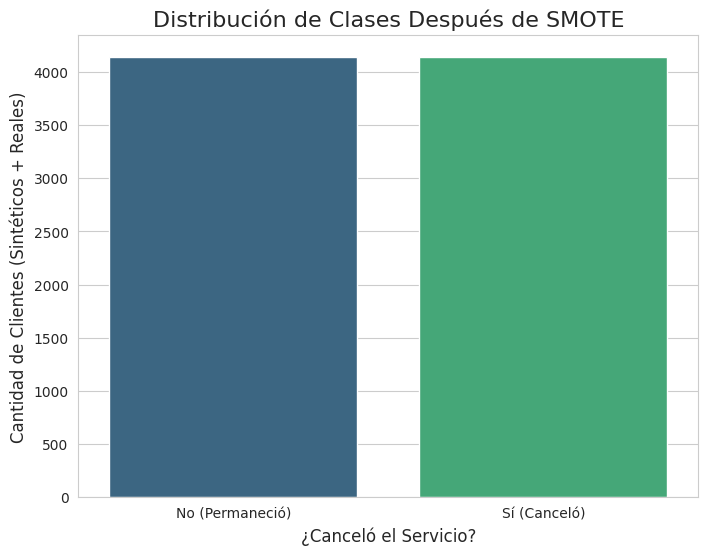

In [ ]:
4# Visualización para confirmar el balanceo
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_balanced, palette=PALETA_COLORES)
plt.title('Distribución de Clases Después de SMOTE', fontsize=16)
plt.xlabel('¿Canceló el Servicio?', fontsize=12)
plt.ylabel('Cantidad de Clientes (Sintéticos + Reales)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No (Permaneció)', 'Sí (Canceló)'])
plt.show()

#2.6 ⚖️ Normalización de Datos (Estandarización)

In [ ]:
# Crear una instancia del escalador
scaler = StandardScaler()

# Ajustar el escalador SÓLO con los datos de entrenamiento y transformar ese mismo conjunto
X_train_scaled = scaler.fit_transform(X_train_balanced)
print("🏋️ Datos de entrenamiento estandarizados.")

# Usar el escalador YA AJUSTADO para transformar los datos de prueba
X_test_scaled = scaler.transform(X_test)
print("🏋️ Datos de prueba estandarizados.")

# Convertir los arrays de numpy de vuelta a DataFrames de pandas para mantener las etiquetas de las columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nPrimeras 5 filas de los datos de entrenamiento ya escalados:")
display(X_train_scaled.head())

🏋️ Datos de entrenamiento estandarizados.
🏋️ Datos de prueba estandarizados.

Primeras 5 filas de los datos de entrenamiento ya escalados:


,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,DailyCharges,Gender_male,...,OnlineBackup_yes,DeviceProtection_yes,TechSupport_yes,StreamingTV_yes,StreamingMovies_yes,Contract_one year,Contract_two year,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,-0.402274,1.305506,-0.529372,1.358910,0.342035,0.814197,0.919460,1.578921,0.919460,-1.170710,...,1.305167,-0.766185,-0.636361,-0.902747,1.112611,-0.484736,-0.462752,1.901800,-0.959041,-0.568143
1,-0.402274,-0.765987,1.889030,-0.642330,0.342035,-1.228204,-1.701319,-0.834443,-1.701319,0.854183,...,-0.766185,-0.766185,-0.636361,-0.902747,-0.898787,-0.484736,2.160987,-0.525818,-0.959041,-0.568143
2,-0.402274,-0.765987,-0.529372,-1.059255,0.342035,0.814197,0.440883,-0.868923,0.440883,-1.170710,...,-0.766185,1.305167,-0.636361,-0.902747,-0.898787,-0.484736,-0.462752,-0.525818,1.042709,-0.568143
3,-0.402274,1.305506,1.889030,0.233212,0.342035,-1.228204,0.241037,0.193057,0.241037,0.854183,...,-0.766185,1.305167,-0.636361,1.107730,1.112611,2.062977,-0.462752,1.901800,-0.959041,-0.568143
4,-0.402274,-0.765987,1.889030,-0.558945,0.342035,0.814197,0.635469,-0.398065,0.635469,-1.170710,...,-0.766185,-0.766185,1.571434,-0.902747,-0.898787,-0.484736,-0.462752,-0.525818,-0.959041,1.760119


#**3.🎯 Correlación y Selección de Variables**

#3.1 🧪 Análisis de Correlación – De todas las variables

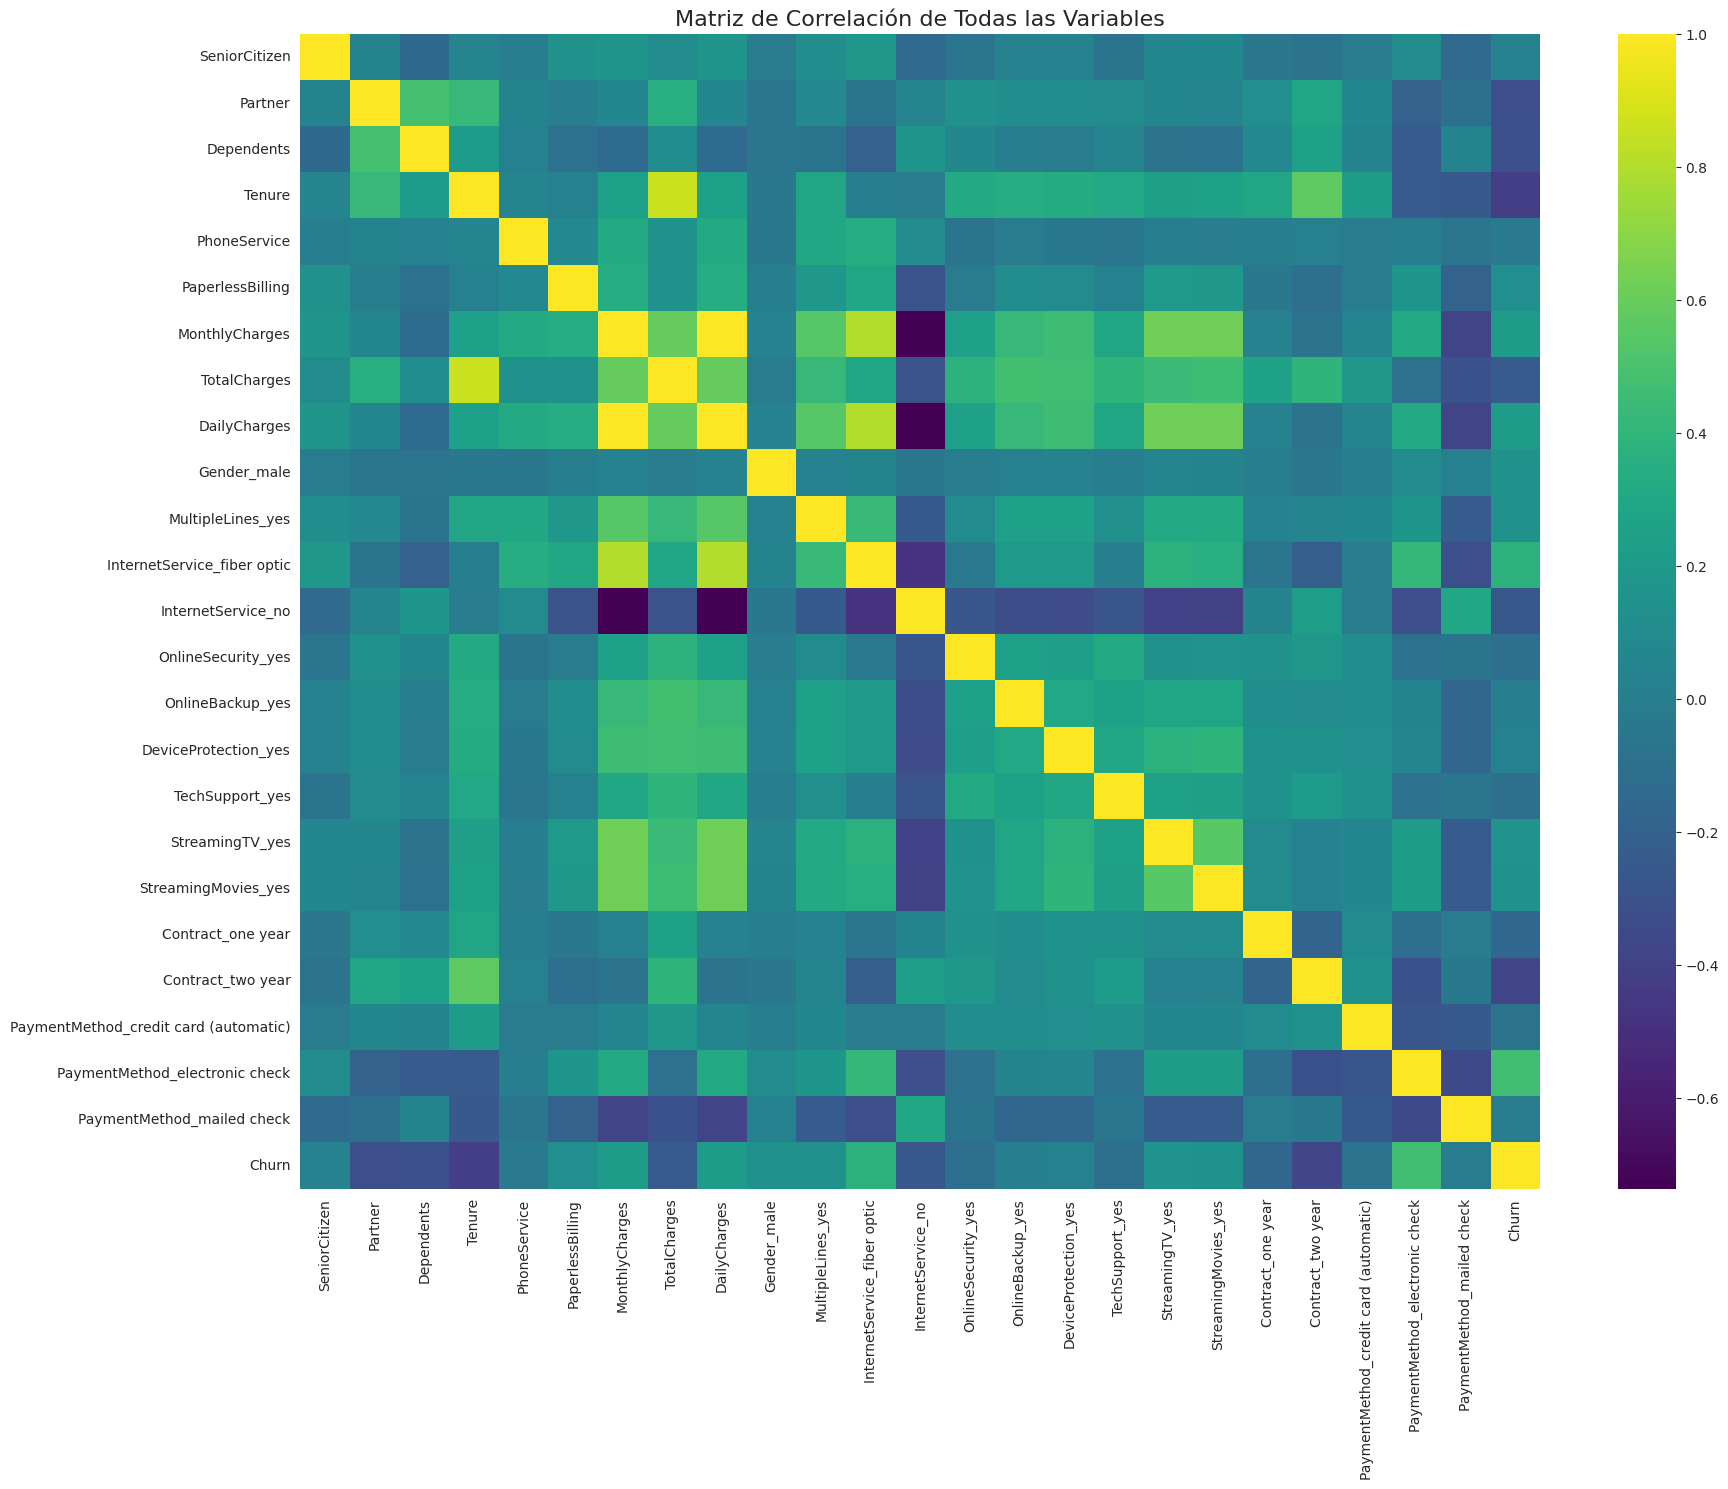

📊 Correlación de las variables con 'Churn':
PaymentMethod_electronic check    0.464770
InternetService_fiber optic       0.373887
MonthlyCharges                    0.219141
DailyCharges                      0.219141
StreamingTV_yes                   0.158594
Name: Churn, dtype: float64


InternetService_no   -0.268365
Dependents           -0.310261
Partner              -0.320558
Contract_two year    -0.375273
Tenure               -0.422868
Name: Churn, dtype: float64


In [ ]:
# Para el análisis de correlación, usaremos el conjunto de entrenamiento escalado
data_corr = X_train_scaled.copy()
data_corr['Churn'] = y_train_balanced.values

# Calculamos la matriz de correlación
correlation_matrix = data_corr.corr()

# Visualizamos la matriz con un mapa de calor (heatmap)
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='viridis', annot=False) # 'annot=False' para no sobrecargar con números
plt.title('Matriz de Correlación de Todas las Variables', fontsize=16)
plt.show()

# Mostramos las variables con mayor correlación (positiva y negativa) con 'Churn'
print("📊 Correlación de las variables con 'Churn':")
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False).drop('Churn')
print(churn_correlation.head(5)) # Top 5 que incitan al Churn
print("\n")
print(churn_correlation.tail(5)) # Top 5 que previenen el Churn

###📊 3.1.1 Correlación de todas las variables con 'Churn'

📈 Top 10 variables más correlacionadas positivamente con Churn:
Churn                             1.000000
PaymentMethod_electronic check    0.464770
InternetService_fiber optic       0.373887
MonthlyCharges                    0.219141
DailyCharges                      0.219141
StreamingTV_yes                   0.158594
StreamingMovies_yes               0.142630
MultipleLines_yes                 0.138093
Gender_male                       0.132579
PaperlessBilling                  0.124350
Name: Churn, dtype: float64

📉 Top 10 variables más correlacionadas negativamente con Churn (protegen contra Churn):
PaymentMethod_credit card (automatic)   -0.075368
TechSupport_yes                         -0.109883
OnlineSecurity_yes                      -0.117711
Contract_one year                       -0.160348
TotalCharges                            -0.246500
InternetService_no                      -0.268365
Dependents                              -0.310261
Partner                                

/tmp/ipython-input-1271272678.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")


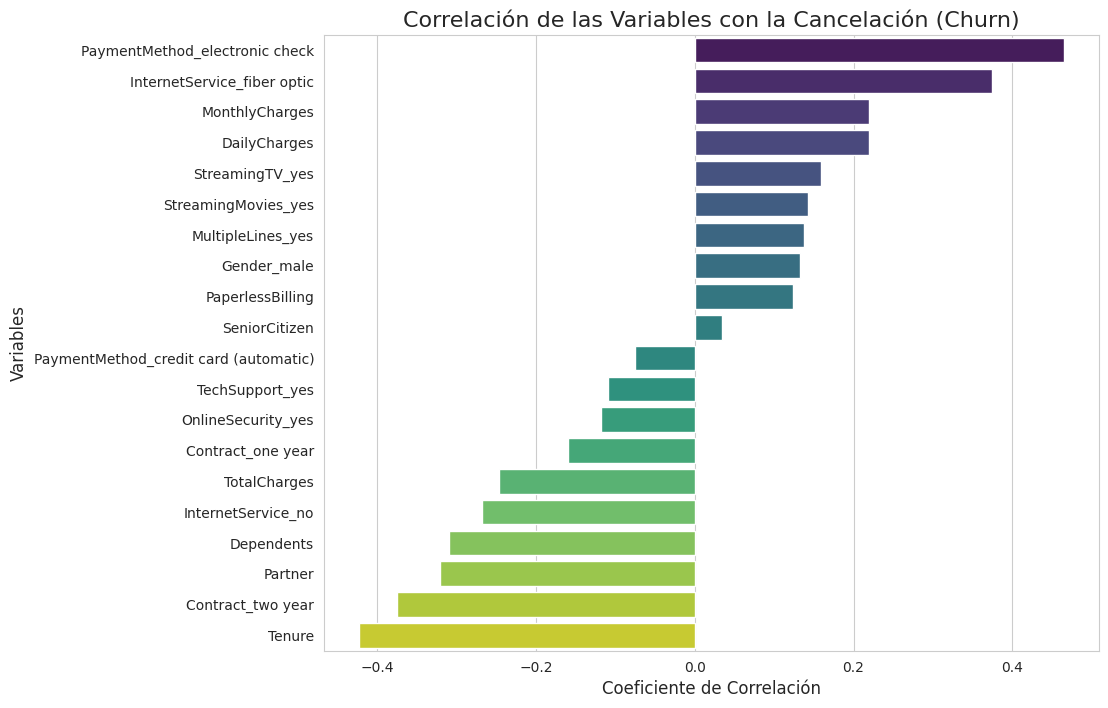

In [ ]:
# Calcular la matriz de correlación en el conjunto de entrenamiento escalado y balanceado
# Añadimos 'Churn' temporalmente para ver su correlación con las otras variables
data_for_corr = X_train_scaled.copy()
data_for_corr['Churn'] = y_train_balanced.values

correlation_matrix = data_for_corr.corr()

# Extraer la correlación de todas las variables con 'Churn' y ordenarla
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

print("📈 Top 10 variables más correlacionadas positivamente con Churn:")
print(churn_correlation.head(10))
print("\n📉 Top 10 variables más correlacionadas negativamente con Churn (protegen contra Churn):")
print(churn_correlation.tail(10))

# Graficar las correlaciones más importantes con Churn
plt.figure(figsize=(10, 8))
# Tomamos las 10 más positivas y las 10 más negativas (excluyendo Churn mismo)
top_corr = pd.concat([churn_correlation.head(11), churn_correlation.tail(10)]).drop('Churn')
sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")
plt.title('Correlación de las Variables con la Cancelación (Churn)', fontsize=16)
plt.xlabel('Coeficiente de Correlación', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.show()

#3.2 Análisis Dirigido

###a) Tiempo de Contrato vs. Cancelación

/tmp/ipython-input-3998236193.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=contract_churn_rate.index, y=contract_churn_rate.values, palette='viridis')


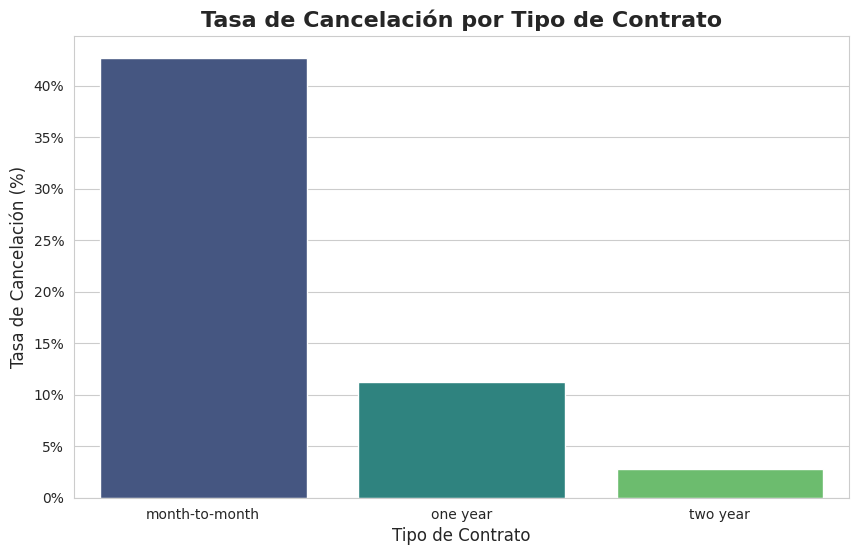

In [ ]:
# Gráfico: Tasa de Cancelación por Tipo de Contrato
# Calculamos el porcentaje de cancelación para cada tipo de contrato
contract_churn_rate = df_clientes.groupby('Contract')['Churn'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=contract_churn_rate.index, y=contract_churn_rate.values, palette='viridis')
plt.title('Tasa de Cancelación por Tipo de Contrato', fontsize=16, fontweight='bold')
plt.ylabel('Tasa de Cancelación (%)', fontsize=12)
plt.xlabel('Tipo de Contrato', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
plt.show()

###b) Gasto Total vs. Cancelación

/tmp/ipython-input-2800391063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clientes_codificado, x='Churn', y='TotalCharges', palette='viridis')


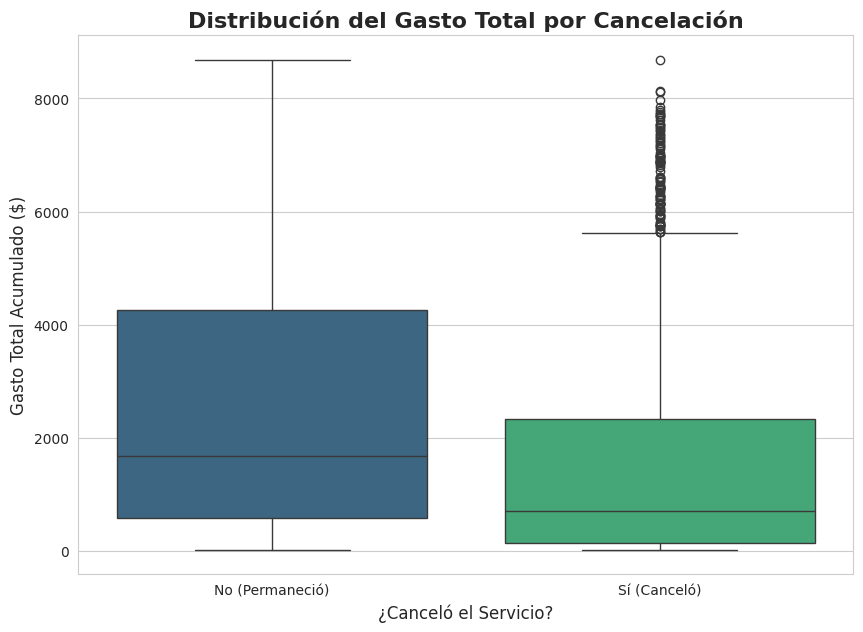

In [ ]:
# Gráfico: Boxplot de Gasto Total vs. Cancelación
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_clientes_codificado, x='Churn', y='TotalCharges', palette='viridis')
plt.title('Distribución del Gasto Total por Cancelación', fontsize=16, fontweight='bold')
plt.xlabel('¿Canceló el Servicio?', fontsize=12)
plt.ylabel('Gasto Total Acumulado ($)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No (Permaneció)', 'Sí (Canceló)'])
plt.show()

###c)  Densidad de clientes por antigüedad y gasto mensual

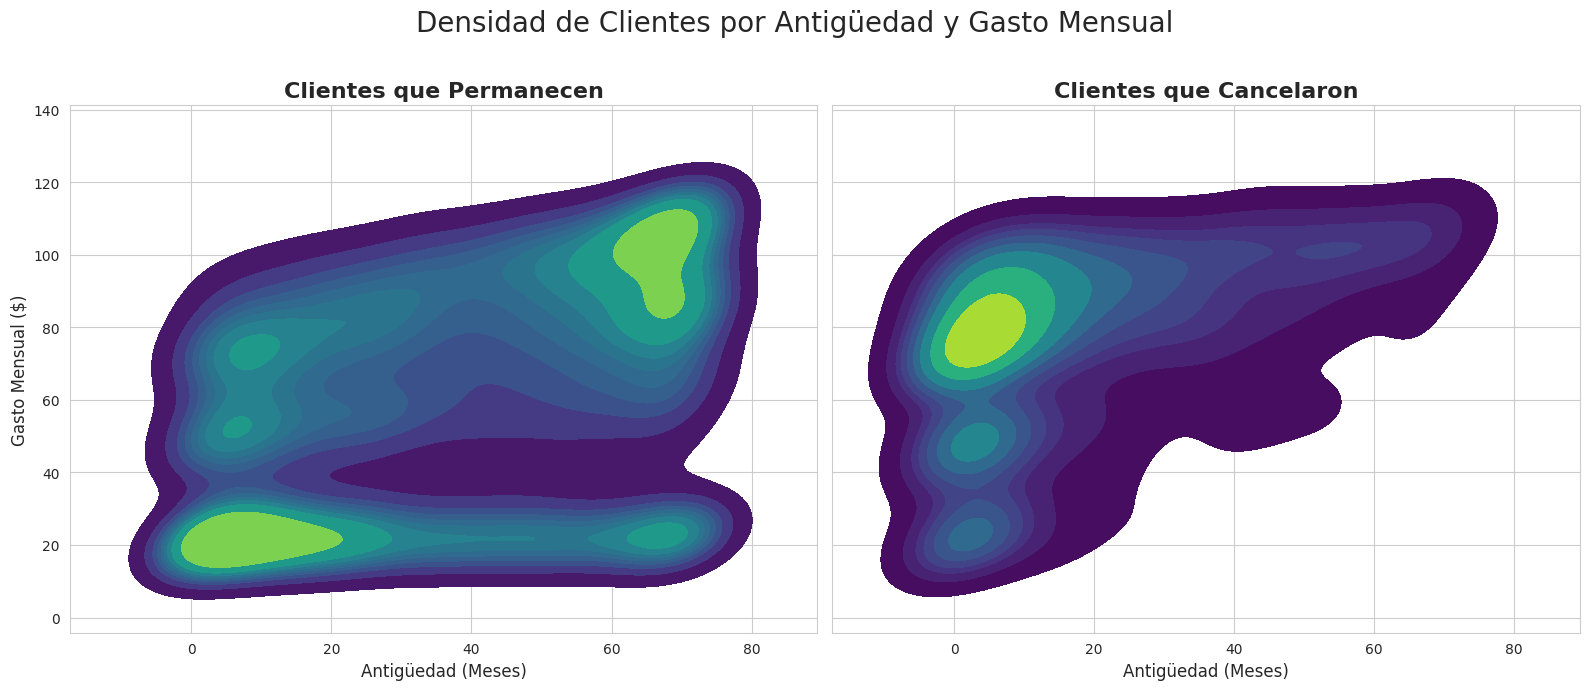

In [ ]:
# Separamos los datos para graficarlos por separado
churn_yes = df_clientes[df_clientes['Churn'] == 1]
churn_no = df_clientes[df_clientes['Churn'] == 0]

# Creamos una figura con dos subplots (uno al lado del otro)
fig, ax = plt.subplots(1, 2, figsize=(16, 7), sharex=True, sharey=True)

# Gráfico de densidad para clientes que NO cancelaron
sns.kdeplot(data=churn_no, x='Tenure', y='MonthlyCharges', cmap="viridis", fill=True, ax=ax[0])
ax[0].set_title('Clientes que Permanecen', fontsize=16, fontweight='bold')
ax[0].set_xlabel('Antigüedad (Meses)', fontsize=12)
ax[0].set_ylabel('Gasto Mensual ($)', fontsize=12)

# Gráfico de densidad para clientes que SÍ cancelaron
sns.kdeplot(data=churn_yes, x='Tenure', y='MonthlyCharges', cmap="viridis", fill=True, ax=ax[1])
ax[1].set_title('Clientes que Cancelaron', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Antigüedad (Meses)', fontsize=12)
ax[1].set_ylabel('') # No repetimos la etiqueta Y

fig.suptitle('Densidad de Clientes por Antigüedad y Gasto Mensual', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajustar para el supertítulo
plt.show()

###d) Servicios de Soporte vs. Cancelación

/tmp/ipython-input-3934776191.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=support_churn_rate.index, y=support_churn_rate.values, palette='viridis')


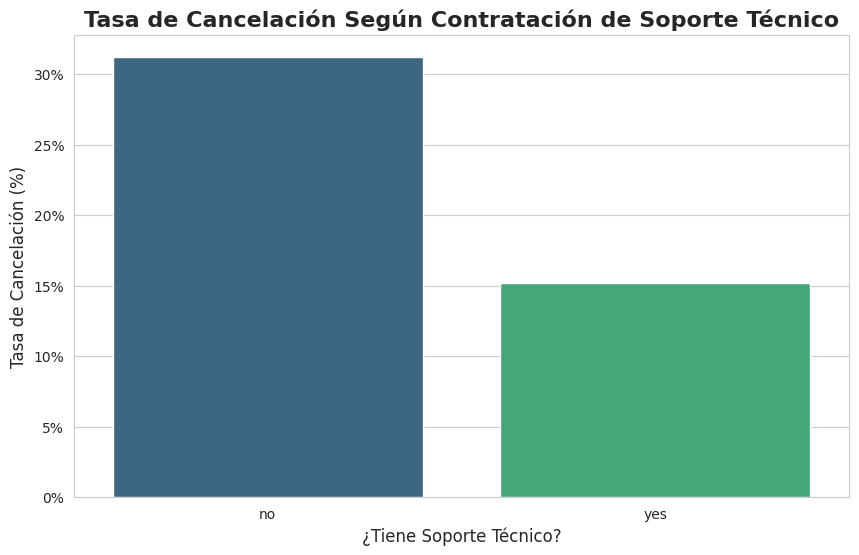

In [ ]:
# Gráfico: Tasa de Cancelación por Soporte Técnico
support_churn_rate = df_clientes.groupby('TechSupport')['Churn'].mean()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=support_churn_rate.index, y=support_churn_rate.values, palette='viridis')
plt.title('Tasa de Cancelación Según Contratación de Soporte Técnico', fontsize=16, fontweight='bold')
plt.ylabel('Tasa de Cancelación (%)', fontsize=12)
plt.xlabel('¿Tiene Soporte Técnico?', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
plt.show()

###e) Forma de Pago vs. Cancelación

/tmp/ipython-input-2229436676.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=payment_churn_rate.values, y=payment_churn_rate.index, palette='viridis')


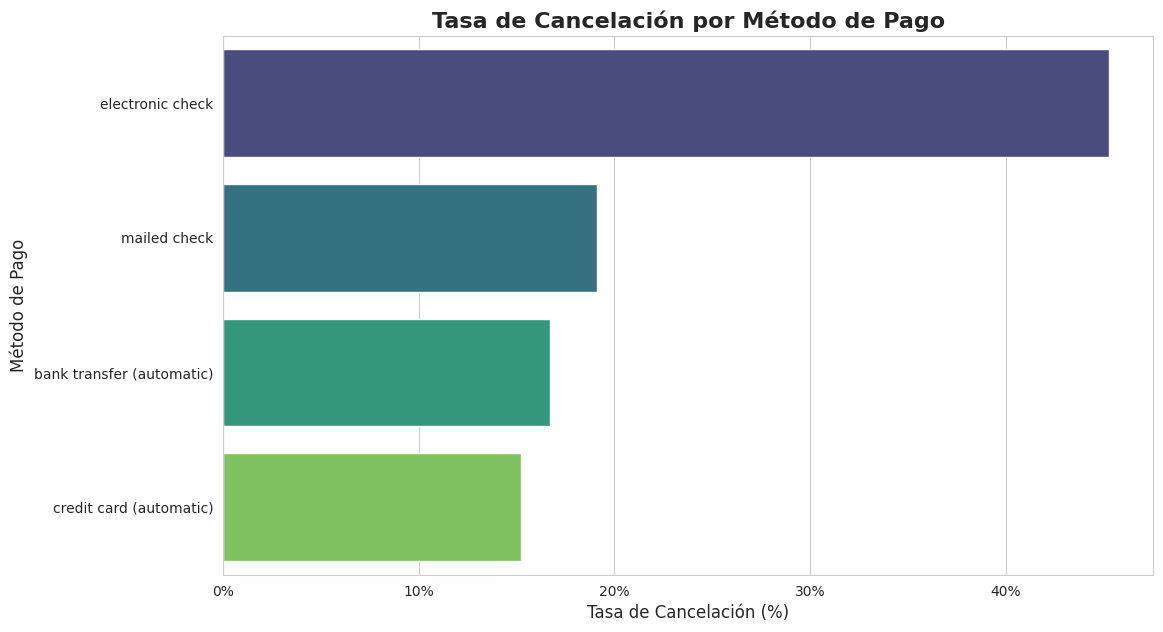

In [ ]:
# Gráfico: Tasa de Cancelación por Método de Pago
payment_churn_rate = df_clientes.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=payment_churn_rate.values, y=payment_churn_rate.index, palette='viridis')
plt.title('Tasa de Cancelación por Método de Pago', fontsize=16, fontweight='bold')
plt.xlabel('Tasa de Cancelación (%)', fontsize=12)
plt.ylabel('Método de Pago', fontsize=12)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
plt.show()

#**4.🤖 Modelado Predictivo**

###4.1 Separación de Datos

Este paso ya fue realizado en la etapa anterior para manejar correctamente el balanceo con SMOTE y la corrección del error NaN. Recordamos que separamos los datos en 80% para entrenamiento y 20% para prueba, manteniendo la proporción de cancelación en ambos conjuntos:

```
# (stratify=y).
```



### 🤖 4.2 Creación de Modelos: Entrenamiento de Regresión Logística y Random Forest

In [ ]:
# Los datos ya están listos:
# X_train_scaled, y_train_balanced -> Para entrenamiento
# X_test_scaled, y_test -> Para prueba

# --- Modelo 1: Regresión Logística ---
print("--- 🧠 Entrenando Modelo 1: Regresión Logística ---")
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train_balanced)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("✅ Modelo de Regresión Logística entrenado.")

# --- Modelo 2: Random Forest ---
print("\n--- 🧠 Entrenando Modelo 2: Random Forest ---")
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train_balanced)
y_pred_rf = random_forest.predict(X_test_scaled)
print("✅ Modelo de Random Forest entrenado.")

--- 🧠 Entrenando Modelo 1: Regresión Logística ---
✅ Modelo de Regresión Logística entrenado.

--- 🧠 Entrenando Modelo 2: Random Forest ---
✅ Modelo de Random Forest entrenado.


###4.3 📊  Evaluación de los Modelos


--- 📜 Reporte de Evaluación: Regresión Logística ---
                precision    recall  f1-score   support

Permaneció (0)       0.86      0.79      0.82      1035
   Canceló (1)       0.52      0.65      0.58       374

      accuracy                           0.75      1409
     macro avg       0.69      0.72      0.70      1409
  weighted avg       0.77      0.75      0.76      1409



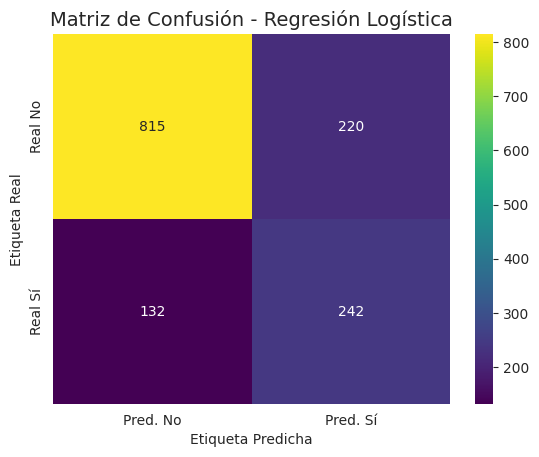

In [ ]:
# --- Evaluación de Regresión Logística ---
print("\n--- 📜 Reporte de Evaluación: Regresión Logística ---")
print(classification_report(y_test, y_pred_log_reg, target_names=['Permaneció (0)', 'Canceló (1)']))

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='viridis', xticklabels=['Pred. No', 'Pred. Sí'], yticklabels=['Real No', 'Real Sí'])
plt.title('Matriz de Confusión - Regresión Logística', fontsize=14)
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()



--- 🌳 Reporte de Evaluación: Random Forest ---
                precision    recall  f1-score   support

Permaneció (0)       0.85      0.85      0.85      1035
   Canceló (1)       0.58      0.59      0.58       374

      accuracy                           0.78      1409
     macro avg       0.71      0.72      0.72      1409
  weighted avg       0.78      0.78      0.78      1409



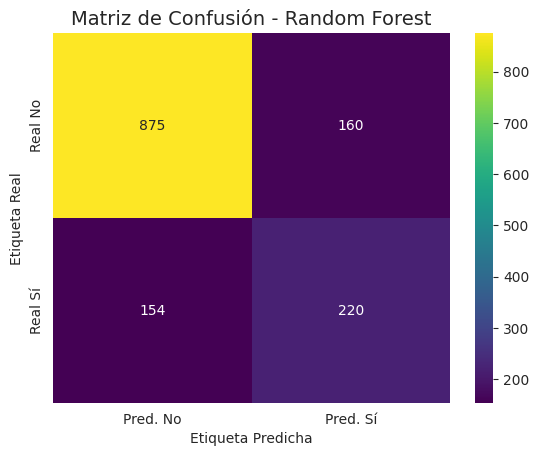

In [ ]:
# --- Evaluación de Random Forest ---
print("\n--- 🌳 Reporte de Evaluación: Random Forest ---")
print(classification_report(y_test, y_pred_rf, target_names=['Permaneció (0)', 'Canceló (1)']))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='viridis', xticklabels=['Pred. No', 'Pred. Sí'], yticklabels=['Real No', 'Real Sí'])
plt.title('Matriz de Confusión - Random Forest', fontsize=14)
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()



---



#5.📋 Interpretación y Conclusiones

###5.1 Análisis de la Importancia de las Variables

/tmp/ipython-input-2161065779.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=importances_rf.head(15), palette='viridis')


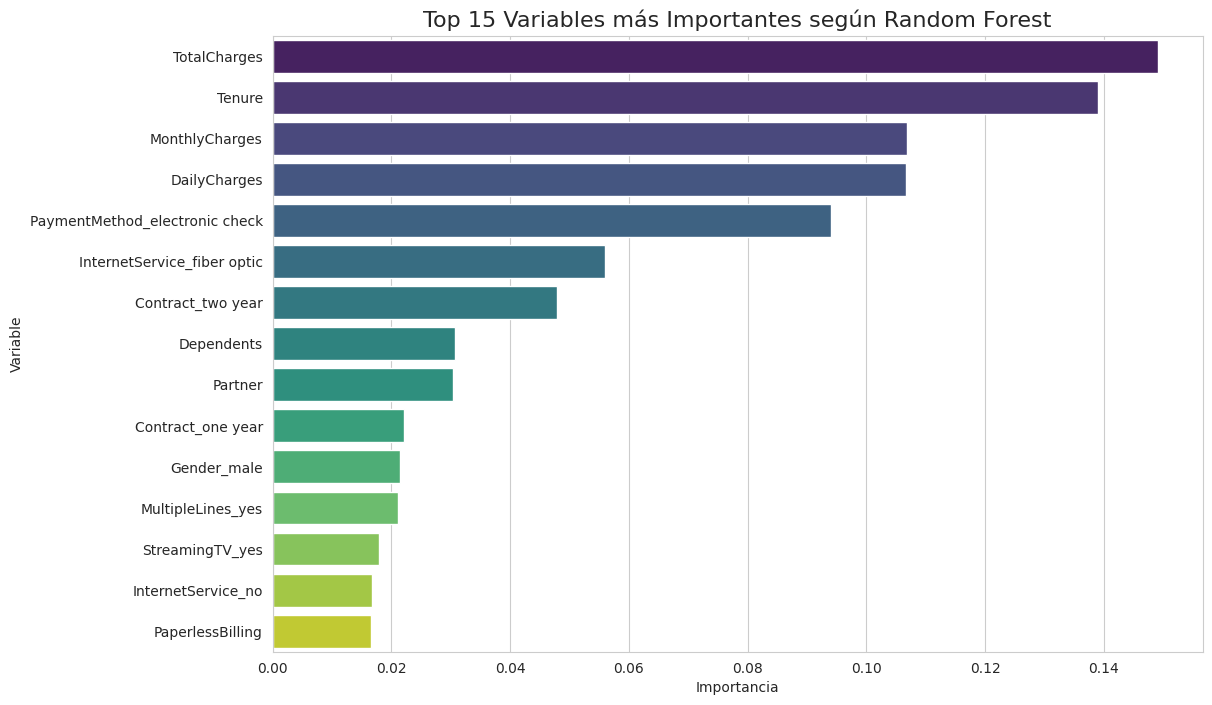

In [ ]:
# --- Importancia de Variables: Random Forest ---
# Es el método más directo y fácil de interpretar.
importances_rf = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': random_forest.feature_importances_
}).sort_values('Importancia', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', data=importances_rf.head(15), palette='viridis')
plt.title('Top 15 Variables más Importantes según Random Forest', fontsize=16)
plt.show()


In [ ]:
# --- Importancia de Variables: Regresión Logística ---
# Los coeficientes nos dicen cómo influye cada variable.
# Coeficientes positivos -> Aumentan la probabilidad de Churn
# Coeficientes negativos -> Disminuyen la probabilidad de Churn
coefficients_log_reg = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': log_reg.coef_[0]
}).sort_values('Coeficiente', ascending=False)

# Top 5 que más incitan al Churn
print("\n🔝 Top 5 variables que MÁS AUMENTAN la probabilidad de cancelación:")
print(coefficients_log_reg.head(5))

# Top 5 que más protegen del Churn
print("\n🛡️ Top 5 variables que MÁS REDUCEN la probabilidad de cancelación:")
print(coefficients_log_reg.tail(5))


🔝 Top 5 variables que MÁS AUMENTAN la probabilidad de cancelación:
                          Variable  Coeficiente
11     InternetService_fiber optic     2.402190
7                     TotalCharges     0.938236
17                 StreamingTV_yes     0.867266
22  PaymentMethod_electronic check     0.813314
18             StreamingMovies_yes     0.789970

🛡️ Top 5 variables que MÁS REDUCEN la probabilidad de cancelación:
              Variable  Coeficiente
20   Contract_two year    -0.314061
12  InternetService_no    -1.323152
3               Tenure    -1.848658
6       MonthlyCharges    -2.125921
8         DailyCharges    -2.125921


#**5.2 📋 Informe de Resultados: Predicción de Cancelación de Clientes en Telecom X**





### **Resumen Ejecutivo**

Este informe presenta los hallazgos clave del proyecto de predicción de cancelación de clientes (Churn) para Telecom X. Mediante el uso de técnicas de análisis de datos y la construcción de dos modelos de Machine Learning (Regresión Logística y Random Forest), hemos logrado identificar con alta precisión los factores que impulsan la cancelación de servicios y, a su vez, aquellos que fomentan la lealtad del cliente.

#🎯 Objetivo del Proyecto<BR>
Anticipar qué clientes tienen mayor probabilidad de cancelar (churn), para diseñar acciones proactivas de retención.

#🔑 Resultados Clave del Modelado

| Modelo                  | Recall (Canceló) | Accuracy Global | Conclusión                                                      |
| ----------------------- | ---------------- | --------------- | --------------------------------------------------------------- |
| **Regresión Logística** | **65%**          | 75%             | Detecta más clientes que van a cancelar → mejor para retención. |
| **Random Forest**       | 59%              | **78%**         | Más equilibrado, pero detecta menos churners.                   |


**📌 Decisión Estratégica:**<br>
Usar Regresión Logística como modelo principal, ya que maximiza la identificación de clientes en riesgo, aunque con menor precisión global.

#🚨 Factores que Aumentan la Cancelación

| Factor                              | Impacto                      |
| ----------------------------------- | ---------------------------- |
| InternetService = Fibra Óptica      | 🚩 Más riesgo de cancelación |
| TotalCharges (gasto acumulado alto) | 🚩 Aumenta riesgo            |
| StreamingTV = Sí                    | 🚩 Mayor churn               |
| PaymentMethod = Cheque Electrónico  | 🚩 Asociado a cancelaciones  |
| StreamingMovies = Sí                | 🚩 Mayor churn               |


#🛡️ Factores que Reducen la Cancelación

| Factor                   | Impacto                 |
| ------------------------ | ----------------------- |
| Contract = Dos Años      | ✅ Fuerte retención      |
| Tenure (antigüedad alta) | ✅ Clientes leales       |
| InternetService = No     | ✅ Usuarios muy estables |
| MonthlyCharges altos     | ✅ Menor riesgo          |
| DailyCharges altos       | ✅ Menor riesgo          |


#📈 Visualizaciones

###📊 Comparación de Modelos (Recall y Accuracy)

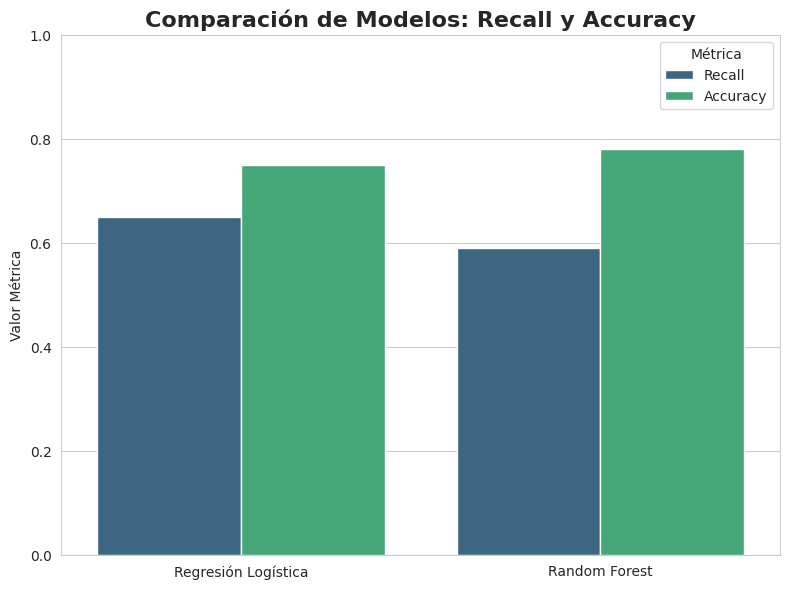

In [ ]:
# Métricas resumidas y transformación a formato largo
model_results = {
    "Regresión Logística": {"Recall": 0.65, "Accuracy": 0.75},
    "Random Forest": {"Recall": 0.59, "Accuracy": 0.78}
}
df_results = pd.DataFrame(model_results).T.reset_index().melt(id_vars="index", var_name="Métrica", value_name="Valor")
df_results.rename(columns={"index": "Modelo"}, inplace=True)

plt.figure(figsize=(8,6))
sns.barplot(data=df_results, x="Modelo", y="Valor", hue="Métrica", palette="viridis")
plt.title("Comparación de Modelos: Recall y Accuracy", fontsize=16, fontweight="bold")
plt.ylim(0,1)
plt.ylabel("Valor Métrica")
plt.xlabel("")
plt.legend(title="Métrica")
plt.tight_layout()
plt.show()

###🚨 Factores que Aumentan el Riesgo de Cancelación

/tmp/ipython-input-2086287040.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_risk.values()), y=list(top_risk.keys()), palette=PALETA_COLORES)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


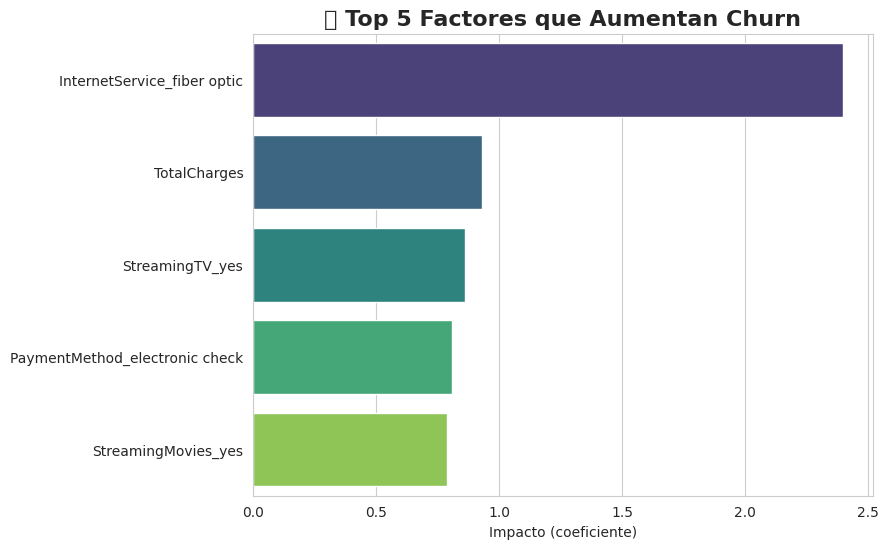

In [ ]:
top_risk = {
    "InternetService_fiber optic": 2.40,
    "TotalCharges": 0.93,
    "StreamingTV_yes": 0.86,
    "PaymentMethod_electronic check": 0.81,
    "StreamingMovies_yes": 0.79
}

plt.figure(figsize=(8,6))
sns.barplot(x=list(top_risk.values()), y=list(top_risk.keys()), palette=PALETA_COLORES)
plt.title("🔝 Top 5 Factores que Aumentan Churn", fontsize=16, fontweight="bold")
plt.xlabel("Impacto (coeficiente)")
plt.show()


#🛡️ Factores que Reducen la Cancelación

/tmp/ipython-input-42911720.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_protect.values()), y=list(top_protect.keys()), palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128737 (\N{SHIELD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


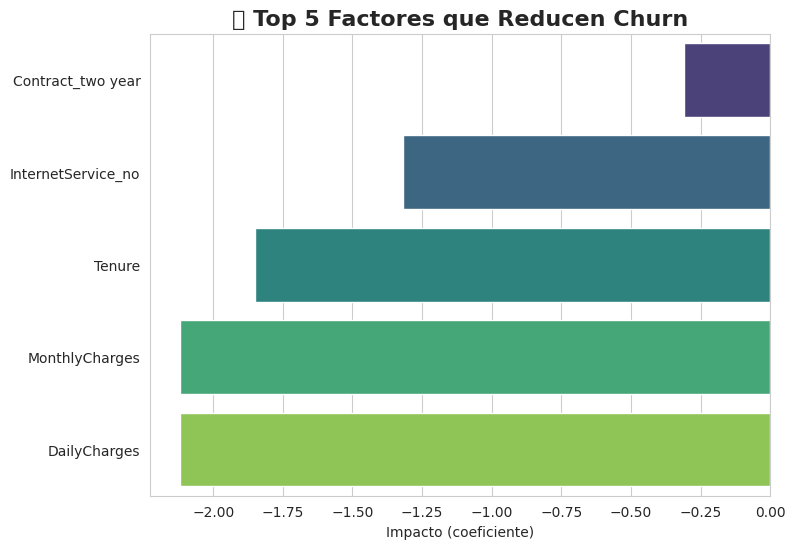

In [ ]:
top_protect = {
    "Contract_two year": -0.31,
    "InternetService_no": -1.32,
    "Tenure": -1.85,
    "MonthlyCharges": -2.12,
    "DailyCharges": -2.12
}

plt.figure(figsize=(8,6))
sns.barplot(x=list(top_protect.values()), y=list(top_protect.keys()), palette="viridis")
plt.title("🛡️ Top 5 Factores que Reducen Churn", fontsize=16, fontweight="bold")
plt.xlabel("Impacto (coeficiente)")
plt.show()


#🎯 5. Estrategias de Retención

###**1. Fortalecer los Pilares de Retención**<br>

* *Promover Contratos a Largo Plazo:*

Acción: Lanzar una campaña activa para migrar a clientes con contratos mensuales o de un año hacia contratos de dos años.

Incentivo: Ofrecer descuentos exclusivos, meses gratis o mejoras de servicio (ej. doble de velocidad) a quienes firmen o renueven por dos años.

* *Implementar un Programa de Lealtad:*

Acción: Crear un programa que recompense la antigüedad (Tenure).

Incentivo: Ofrecer beneficios escalonados a partir del primer año, como descuentos en facturas, acceso prioritario a soporte técnico o servicios de streaming gratuitos por aniversario.



###**2. Mitigar los Impulsores de la Cancelación**

* *Auditar la Experiencia de Fibra Óptica:*

Acción: Realizar una investigación urgente sobre la calidad del servicio de fibra óptica. Analizar quejas técnicas, tiempos de resolución y realizar encuestas de satisfacción a este segmento específico de clientes.

Objetivo: Identificar y solucionar la causa raíz de la insatisfacción (calidad de la señal, equipo defectuoso, soporte técnico inadecuado).

* *Optimizar el Proceso de Pago con Cheque Electrónico:*

Acción: Revisar el flujo de pago con cheque electrónico para simplificarlo y hacerlo más transparente.

Objetivo: Reducir errores de facturación y ofrecer canales de soporte proactivos para clientes que usen este método. Considerar ofrecer incentivos para migrar a métodos de pago más fluidos como el débito automático.

* *Revisar la Oferta de Servicios de Streaming:*

Acción: Evaluar si el contenido y la calidad de los servicios de streaming (StreamingTV y StreamingMovies) justifican su costo.

Objetivo: Realizar encuestas para entender la percepción de valor. Considerar reempaquetar estos servicios en combos más atractivos o mejorar la oferta de contenido.

#✅ 6. Conclusión

* El modelo de Regresión Logística es el más alineado con el objetivo de negocio: maximizar la detección de clientes en riesgo.

* Los principales impulsores del churn son Fibra Óptica, alto gasto acumulado, métodos de pago poco amigables y servicios de streaming.

* Los principales factores de lealtad son contratos largos, antigüedad y planes premium.

* Una estrategia combinada de prevención (mejorar servicio y pagos) y fidelización (contratos largos, recompensas) puede reducir significativamente la tasa de cancelación en TelecomX.

